In [4]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Text(0, 0.5, 'Token Value [$]')

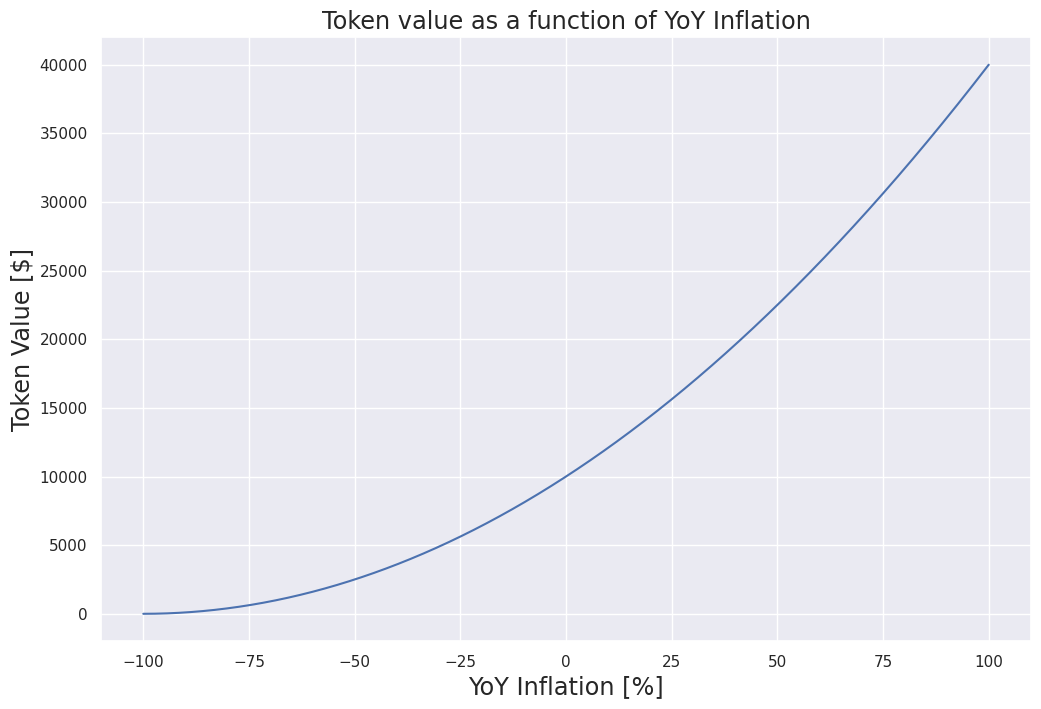

In [30]:
def calculate_sq_index(inflation):
    return (100 * (1 + inflation))**2

def calculate_base_index(inflation):
    return 100 * (1 + inflation)

def percent(inflation):
    return inflation/100
    

start_inflation_yoy = percent(9.6)
tokens = 1

percentages = np.linspace(-100, 100, 2000)
index = []
for yoy_percentage in percentages:
    index.append(calculate_sq_index(percent(yoy_percentage)))

plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(percentages,index)
plt.title("Token value as a function of YoY Inflation", fontsize="x-large")
plt.xlabel('YoY Inflation [%]', fontsize="x-large")
plt.ylabel('Token Value [$]',fontsize="x-large")


In [20]:
def simulate_scenario(start_inflation, end_inflation, side):
    if side == "long":
        profit = calculate_sq_index(end_inflation) - calculate_sq_index(start_inflation)
        profit_pct = (calculate_sq_index(end_inflation) - calculate_sq_index(start_inflation)) /  calculate_sq_index(start_inflation)
        return profit, profit_pct
    elif side == "short":
        profit = calculate_sq_index(start_inflation) - calculate_sq_index(end_inflation)
        profit_pct = (calculate_sq_index(start_inflation) - calculate_sq_index(end_inflation)) /  calculate_sq_index(start_inflation)
        return profit, profit_pct
    
start_inflation = percent(10)
end_inflation = percent(3)
p1, p2 = simulate_scenario(start_inflation, end_inflation, "short")
print(f"""
Scenario 1:

start inflation: {start_inflation*100:.2f}%
end inflation: {end_inflation*100:.2f}%

PnL: {p1:.2f} USD
PnL pct: {p2 *100:.2f}%
""")



Scenario 1:

start inflation: 10.00%
end inflation: 3.00%

PnL: 1491.00 USD
PnL pct: 12.32%



Text(0, 0.5, 'PnL [%]')

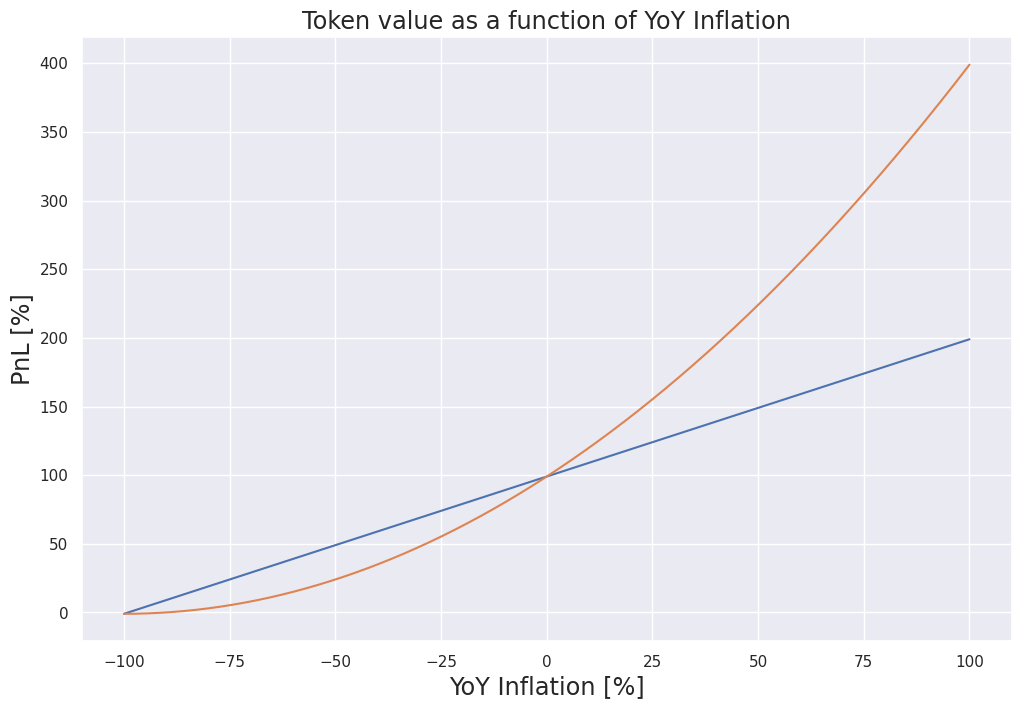

In [34]:
def calculate_sq_index(inflation):
    return (100 * (1 + inflation))**2

def calculate_base_index(inflation):
    return 100 * (1 + inflation)

def percent(inflation):
    return inflation/100
    

start_inflation_yoy = percent(9.6)
tokens = 1

percentages = np.linspace(-100, 100, 2000)
index_sq = []
index = []
for yoy_percentage in percentages:
    index_sq.append(100 * calculate_sq_index(percent(yoy_percentage)) / calculate_sq_index(percent(0)) - 1)
    index.append(100 * calculate_base_index(percent(yoy_percentage)) / calculate_base_index(percent(0)) - 1)

plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(percentages,index, label="Inflation")
plt.plot(percentages,index_sq, label="Inflation^2")
plt.title("Token value as a function of YoY Inflation", fontsize="x-large")
plt.xlabel('YoY Inflation [%]', fontsize="x-large")
plt.ylabel('PnL [%]',fontsize="x-large")
